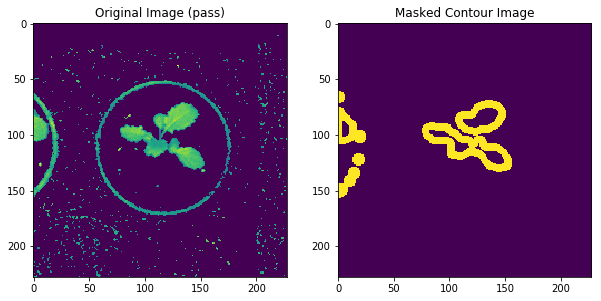

 ------------------------ n= 8 , r=1------------------ 


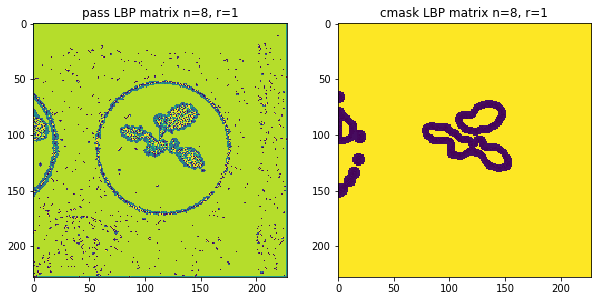

 Pass bins are:
[  918   757   284   874   762  1191   154   124 46383   537]
 Cmask bins are:
[ 124  131  126  397  419  193   64   48 1262  164]


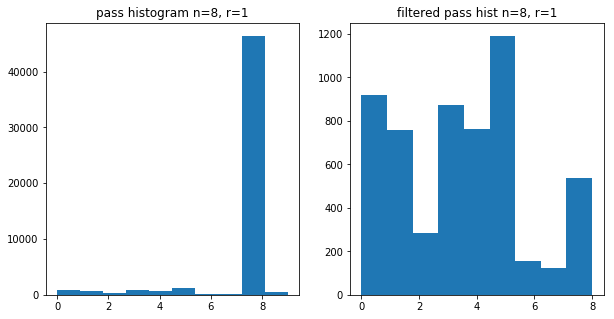

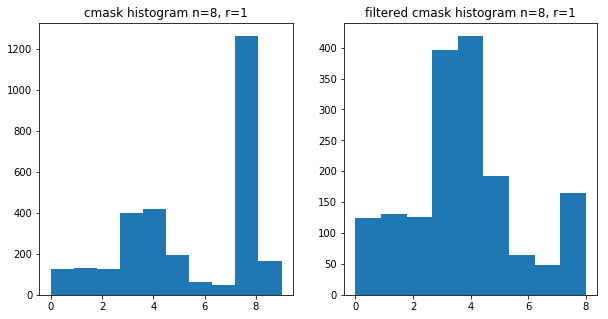

 ------------------------ n= 16 , r=2------------------ 


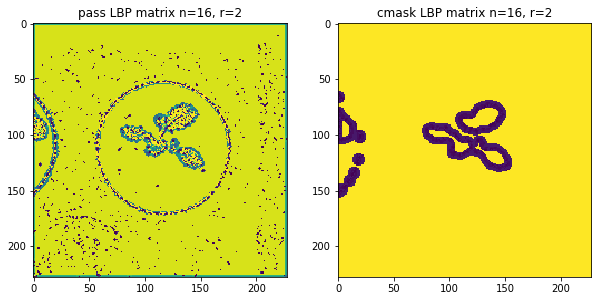

 Pass bins are:
[ 1287   380   260   129    79   136   245   432   340   961   110   826
    74    36    42    43 45455  1149]
 Cmask bins are:
[ 121   81   78   64   51   95  156  241  214  113   67   32   23   15   13
    8 1201  355]


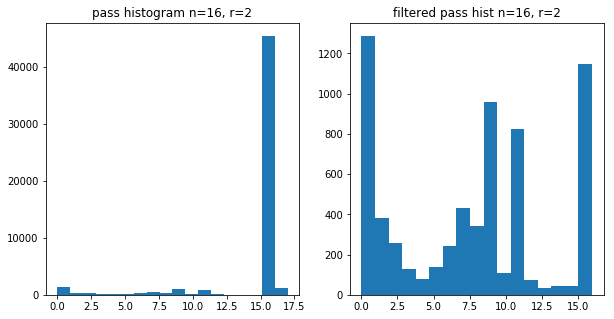

In [ ]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
from skimage import feature

plt.rcParams['figure.figsize'] = (10,5)

pass_img_filename = "/scratch/data/latest_dataset/work/train/can/can1S2-r2-60_b0.bmp"
cmask_img_filename = "/scratch/data/latest_dataset/work_cmask_T-6/train/can/can1S2-r2-60_b0.bmp"

pass_img   = cv2.imread(pass_img_filename, cv2.IMREAD_GRAYSCALE)
cmask_img   = cv2.imread(cmask_img_filename, cv2.IMREAD_GRAYSCALE)
plt.subplot(1,2,1)
plt.imshow(pass_img)
plt.title('Original Image (pass)')
plt.subplot(1,2,2)
plt.imshow(cmask_img)
plt.title('Masked Contour Image')
plt.show()

n_arr=[8,16,24]
r_arr=[1,2,3]
bins_combined_pass  = []
bins_combined_cmask = []
for i in range(len(n_arr)):
    n = n_arr[i]
    r = r_arr[i]
    print (' ------------------------ n= %d , r=%d------------------ ' %(n,r))
    pass_lbp_matrix  = feature.local_binary_pattern(pass_img, n, r, method="uniform")
    cmask_lbp_matrix  = np.where((cmask_img==255),pass_lbp_matrix,255)
    plt.subplot(1,2,1)
    plt.imshow(pass_lbp_matrix)
    plt.title('pass LBP matrix n=%d, r=%d' %(n,r))
    plt.subplot(1,2,2)
    plt.imshow(cmask_lbp_matrix)
    plt.title('cmask LBP matrix n=%d, r=%d' %(n,r))
    plt.show()

    pass_bins, pass_edges = np.histogram(pass_lbp_matrix.ravel(),bins=np.arange(0, n+3), range=(0,n+2))
    cmask_bins, cmask_edges = np.histogram(cmask_lbp_matrix.ravel(),bins=np.arange(0, n+3), range=(0,n+2))

    bin_to_delete = len(pass_bins)-2
    filtered_pass_bins = np.delete(pass_bins,[bin_to_delete],0)
    filtered_cmask_bins = np.delete(cmask_bins,[bin_to_delete],0)
    print ' Pass bins are:'
    print pass_bins
    print ' Cmask bins are:'
    print cmask_bins

    plt.subplot(1,2,1)
    plt.hist(range(len(pass_bins)), bins=len(pass_bins), weights=pass_bins)
    plt.title('pass histogram n=%d, r=%d' %(n,r))
    plt.subplot(1,2,2)
    plt.hist(range(len(filtered_pass_bins)), bins=len(filtered_pass_bins), weights=filtered_pass_bins)
    plt.title('filtered pass hist n=%d, r=%d' %(n,r))
    plt.show()

    plt.subplot(1,2,1)
    plt.hist(range(len(cmask_bins)), bins=len(cmask_bins), weights=cmask_bins)
    plt.title('cmask histogram n=%d, r=%d' %(n,r))
    plt.subplot(1,2,2)
    plt.hist(range(len(filtered_cmask_bins)), bins=len(filtered_cmask_bins), weights=filtered_cmask_bins)
    plt.title('filtered cmask histogram n=%d, r=%d' %(n,r))
    plt.show()
    
    # Now append the bins to the previous histogram
    bins_combined_pass = np.concatenate((bins_combined_pass,pass_bins), axis=0 )
    bins_combined_cmask = np.concatenate((bins_combined_cmask,cmask_bins), axis=0 )
    
print ' ------------------------- COMBINED BINS -------------------------------'

print ' Len = %d' %len(bins_combined_pass)